<a href="https://colab.research.google.com/github/potterhead789/face-mask-recognition-using-CNN/blob/main/DL_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [9]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [11]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [12]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [13]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [15]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2571.jpg', 'with_mask_2532.jpg', 'with_mask_2797.jpg', 'with_mask_1114.jpg', 'with_mask_2906.jpg']
['with_mask_428.jpg', 'with_mask_966.jpg', 'with_mask_3671.jpg', 'with_mask_2504.jpg', 'with_mask_1990.jpg']


In [16]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_881.jpg', 'without_mask_1779.jpg', 'without_mask_3650.jpg', 'without_mask_3488.jpg', 'without_mask_857.jpg']
['without_mask_1399.jpg', 'without_mask_110.jpg', 'without_mask_3730.jpg', 'without_mask_1017.jpg', 'without_mask_3470.jpg']


In [17]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  =>  1

without mask  =>  0

In [18]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [19]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [20]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [21]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

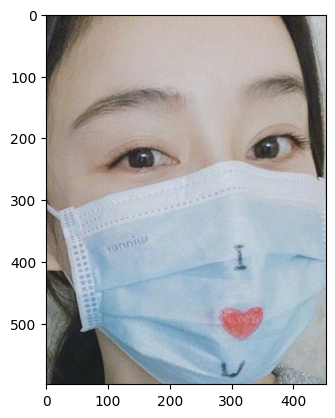

In [22]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1466.jpg')
imgplot = plt.imshow(img)
plt.show()

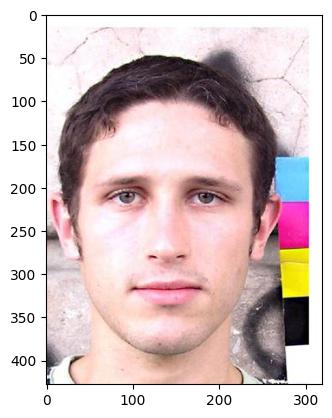

In [23]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1234.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [24]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
type(data)

list

In [26]:
len(data)

7553

array([[[193, 170, 155],
        [197, 174, 154],
        [197, 174, 150],
        ...,
        [125, 122, 138],
        [ 91,  82,  85],
        [ 94,  81,  80]],

       [[193, 170, 155],
        [197, 174, 154],
        [197, 174, 150],
        ...,
        [125, 122, 138],
        [ 91,  82,  85],
        [ 94,  81,  80]],

       [[194, 171, 156],
        [198, 175, 155],
        [198, 175, 151],
        ...,
        [125, 122, 138],
        [ 91,  82,  86],
        [ 95,  82,  81]],

       ...,

       [[205, 196, 184],
        [ 86,  79,  87],
        [ 55,  54,  79],
        ...,
        [161,  75,  42],
        [161,  75,  42],
        [165,  79,  46]],

       [[184, 175, 167],
        [ 60,  53,  64],
        [ 62,  61,  89],
        ...,
        [160,  75,  42],
        [159,  74,  40],
        [164,  80,  46]],

       [[164, 155, 149],
        [ 51,  45,  58],
        [ 65,  63,  93],
        ...,
        [158,  74,  40],
        [157,  73,  39],
        [164,  80,  46]]], dtype=uint8)
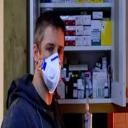

In [27]:
data[0]

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
type(Y)

numpy.ndarray

In [33]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [34]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 55,  72, 100],
        [ 53,  75, 100],
        [ 54,  77, 100],
        ...,
        [174, 229, 240],
        [196, 233, 236],
        [206, 233, 235]],

       [[ 54,  71,  99],
        [ 52,  74,  99],
        [ 53,  75,  99],
        ...,
        [172, 226, 239],
        [197, 234, 236],
        [207, 233, 235]],

       [[ 54,  71,  99],
        [ 53,  73,  99],
        [ 53,  74,  98],
        ...,
        [167, 222, 237],
        [198, 235, 237],
        [207, 234, 236]],

       ...,

       [[ 37,  56,  63],
        [ 37,  56,  63],
        [ 38,  57,  64],
        ...,
        [ 80, 111, 112],
        [ 77, 105, 108],
        [107, 129, 126]],

       [[ 37,  56,  63],
        [ 36,  55,  62],
        [ 36,  55,  62],
        ...,
        [ 76, 108, 110],
        [ 70,  99, 102],
        [100, 125, 121]],

       [[ 38,  57,  64],
        [ 38,  57,  64],
        [ 39,  58,  65],
        ...,
        [ 67,  99, 100],
        [ 60,  91,  93],
        [ 94, 122, 117]]], dtype=uint8)
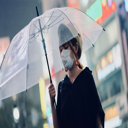

In [38]:
X_train[0]

In [39]:
X_train_scaled[0]

array([[[0.21568627, 0.28235294, 0.39215686],
        [0.20784314, 0.29411765, 0.39215686],
        [0.21176471, 0.30196078, 0.39215686],
        ...,
        [0.68235294, 0.89803922, 0.94117647],
        [0.76862745, 0.91372549, 0.9254902 ],
        [0.80784314, 0.91372549, 0.92156863]],

       [[0.21176471, 0.27843137, 0.38823529],
        [0.20392157, 0.29019608, 0.38823529],
        [0.20784314, 0.29411765, 0.38823529],
        ...,
        [0.6745098 , 0.88627451, 0.9372549 ],
        [0.77254902, 0.91764706, 0.9254902 ],
        [0.81176471, 0.91372549, 0.92156863]],

       [[0.21176471, 0.27843137, 0.38823529],
        [0.20784314, 0.28627451, 0.38823529],
        [0.20784314, 0.29019608, 0.38431373],
        ...,
        [0.65490196, 0.87058824, 0.92941176],
        [0.77647059, 0.92156863, 0.92941176],
        [0.81176471, 0.91764706, 0.9254902 ]],

       ...,

       [[0.14509804, 0.21960784, 0.24705882],
        [0.14509804, 0.21960784, 0.24705882],
        [0.14901961, 0

**Building a Convolutional Neural Networks (CNN)**

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - acc: 0.7379 - loss: 0.5734 - val_acc: 0.8165 - val_loss: 0.3728
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8697 - loss: 0.3135 - val_acc: 0.9107 - val_loss: 0.2310
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9162 - loss: 0.2311 - val_acc: 0.9273 - val_loss: 0.1933
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9281 - loss: 0.1844 - val_acc: 0.9256 - val_loss: 0.1926
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9351 - loss: 0.1489 - val_acc: 0.9058 - val_loss: 0.2257


**Model Evaluation**

In [44]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9103 - loss: 0.2139
Test Accuracy = 0.9192587733268738


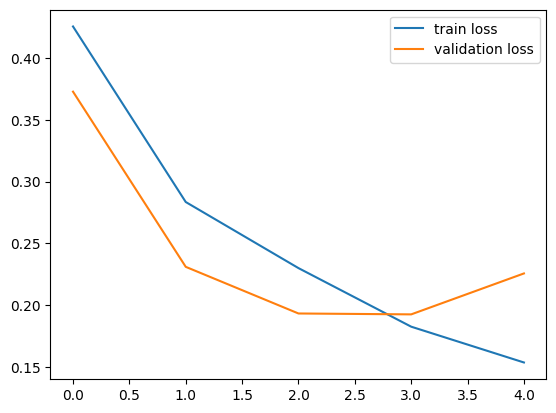

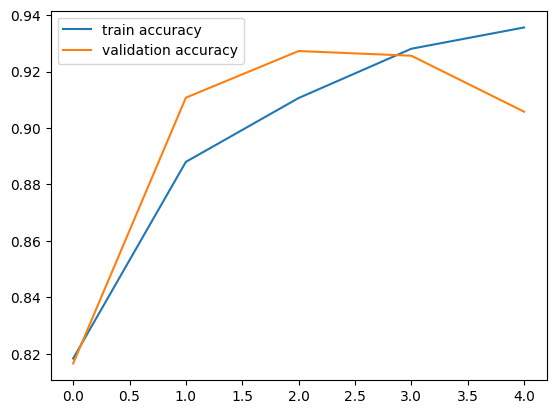

In [45]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test_with_mask.jpg


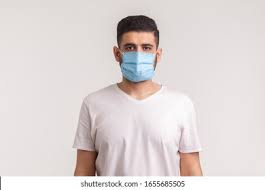

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
[[0.47890013 0.52478373]]
1
MASK


In [46]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)


if input_pred_label == 1:
  print('MASK')
else:
  print('NO MASK')